In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


result of cholesky decomposition :
[[ 1.          0.        ]
 [ 0.7         0.71414284]]
covariance matrix of generated random numbers:
[[ 1.001001    0.68353692]
 [ 0.68353692  1.001001  ]]


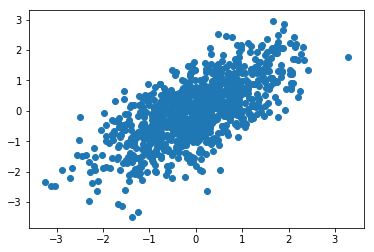

In [11]:
## generate random numbers correlated
corr=0.7
n=1000
rho=np.array([[1,corr],[corr,1]])
L=np.linalg.cholesky(rho)
x=np.random.randn(2,n)
r=np.dot(L,x).T

std=StandardScaler()
r_std=std.fit_transform(r)
# print(np.mean(r_std,axis=0))
# print(np.std(r_std,axis=0))
cov=np.cov(r_std.T)

plt.scatter(r[:,0],r[:,1])
print 'result of cholesky decomposition :'
print L
# print 'corrcoef matrix :'
# print np.corrcoef(r_std[:,0],r_std[:,1])
print 'covariance matrix of generated random numbers:'
print cov

eigenvalues of covariance matrix
[ 1.68453792  0.31746408]
covariance matrix of transformed random numbers
[[  1.68453792e+00  -3.82299019e-17]
 [ -3.82299019e-17   3.17464078e-01]]


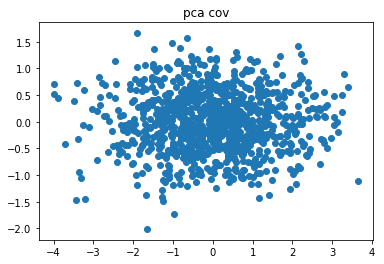

In [13]:
#pca
[eig_val_cov,eig_vec_cov]=np.linalg.eig(cov)
eig_vec_cov[np.argsort(eig_val_cov)[::-1],:]
eig_val_cov=eig_val_cov[np.argsort(eig_val_cov)[::-1]]

r_pca_cov=np.dot(r_std,eig_vec_cov)

print 'eigenvalues of covariance matrix'
print eig_val_cov
print 'covariance matrix of transformed random numbers'
print np.cov(r_pca_cov.T)

plt.scatter(r_pca_cov[:,0],r_pca_cov[:,1])
plt.title('pca cov')

eigenvalues of covariance matrix by SVD
[ 1.68453792  0.31746408]
covariance matrix of transformed random numbers
[[  1.68453792e+00   3.82299019e-17]
 [  3.82299019e-17   3.17464078e-01]]


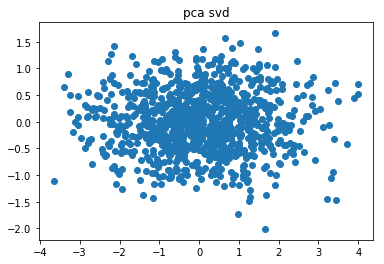

In [14]:
#svd
[U,s,V]=np.linalg.svd(r_std, full_matrices=False)
V=-V.T
eig_val_svd=s**2/(n-1)

r_pca_svd=np.dot(r_std,V)

print 'eigenvalues of covariance matrix by SVD'
print eig_val_svd

print 'covariance matrix of transformed random numbers'
print np.cov(r_pca_svd.T)

plt.scatter(r_pca_svd[:,0],r_pca_svd[:,1])
plt.title('pca svd')

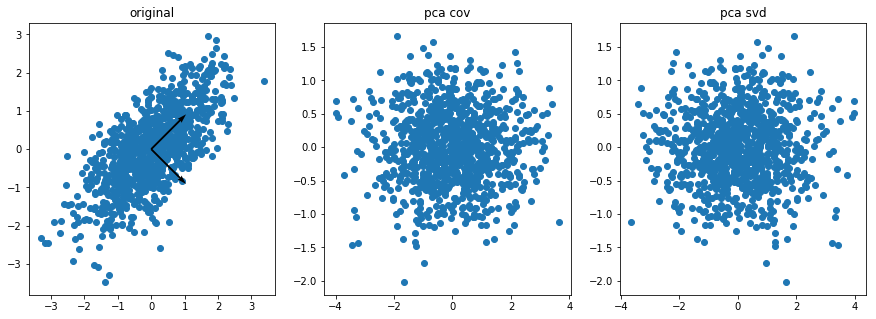

In [16]:
#plot
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.scatter(r_std[:,0],r_std[:,1])
plt.quiver(0,0,eig_vec_cov[0,0],eig_vec_cov[0,1],scale=5)
plt.quiver(0,0,eig_vec_cov[1,0],eig_vec_cov[1,1],scale=5)
plt.title('original')

plt.subplot(1,3,2)
plt.scatter(r_pca_cov[:,0],r_pca_cov[:,1])
plt.title('pca cov')

plt.subplot(1,3,3)
plt.scatter(r_pca_svd[:,0],r_pca_svd[:,1])
plt.title('pca svd')

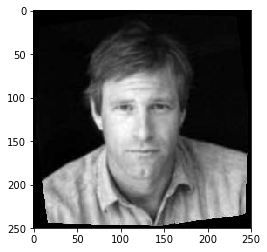

In [52]:
#face data

img_list=np.load('face_data_1000.npy')

plt.gray()
plt.imshow(img_list[0,:,:])
n=len(img_list)

In [53]:
img_list_flatten=img_list.reshape(len(img_list),250*250)

#standardization
std=StandardScaler()
img_list_flatten_std=std.fit_transform(img_list_flatten)

del img_list
del img_list_flatten

#principal component analysis
pca=PCA()
img_pca=pca.fit_transform(img_list_flatten_std)

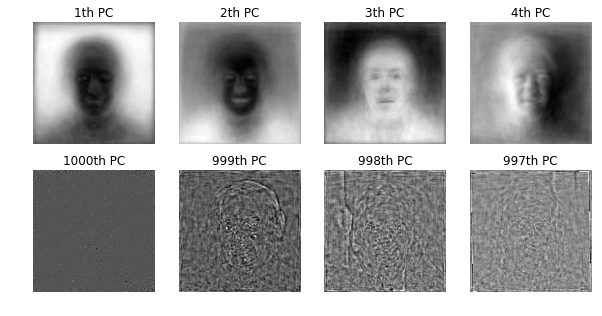

In [19]:
#principle component
plt.figure(figsize=[10,5])
for k in range(4):
    plt.subplot(2,4,k+1)
    plt.imshow(pca.components_[k,:].reshape(250,250))
    plt.title('{}th PC'.format(k+1))
    plt.axis('off')
for k in range(4):
    plt.subplot(2,4,k+1+4)
    plt.imshow(pca.components_[-k-1,:].reshape(250,250))
    plt.title('{}th PC'.format(n-k))
    plt.axis('off')

the number of dimensions : [10, 100, 300]
cumulative propotion respectively : [ 0.56715969  0.85095406  0.94247353]


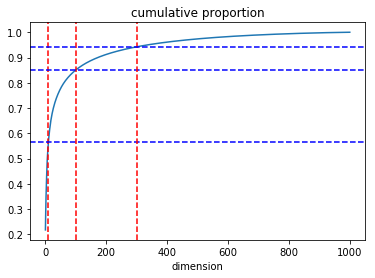

In [46]:
#cumulative proportion
lam=pca.explained_variance_
lam=lam/np.sum(lam)
cp=np.cumsum(lam)

n_pc_list=[10,100,300]
print 'the number of dimensions : {}'.format(n_pc_list)
print 'cumulative propotion respectively : {}'.format(cp[n_pc_list])



plt.plot(np.arange(1,n+1,1),cp)
for n_pc in n_pc_list:
    plt.axvline(n_pc,color = 'red',linestyle='--')
    plt.axhline(cp[n_pc],color='blue',linestyle='--')
plt.title('cumulative proportion')
plt.xlabel('dimension')

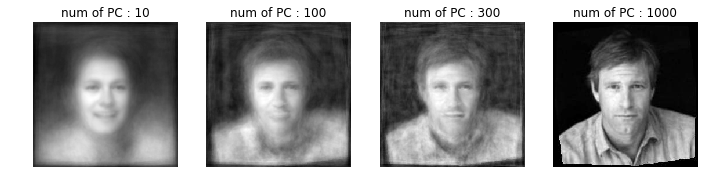

In [47]:
# #reconstruct
plt.figure(figsize=[15,15])
n_pc_list=[10,100,300]
# plt.subplot(1,len(n_pc_list)+1,1)
# plt.imshow(img_list[0,:,:])
# plt.axis('off')
# plt.title('original')
n_pc_list=n_pc_list+[n]
for k,n_pc in enumerate(n_pc_list):
    img_inv=np.dot(img_pca[0:1,:n_pc],pca.components_[:n_pc,:])
    img_inv=std.inverse_transform(img_inv)
    img_inv=img_inv.reshape(len(img_inv),250,250)
    plt.subplot(1,len(n_pc_list)+1,k+2)
    plt.imshow(img_inv[0,:,:])
    plt.axis('off')
    plt.title('num of PC : {}'.format(n_pc))

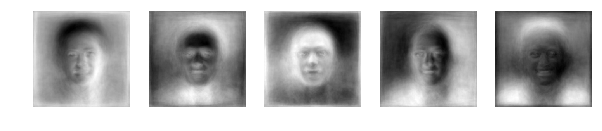

In [50]:
#おまけ
#extra

#random face
n=5
plt.figure(figsize=[10,10])
r=np.random.randn(n,250**2)
dsub=10
b=np.dot(r,pca.components_[:dsub].T)
tmp=np.dot(b,pca.components_[:dsub])
#tmp=tmp.reshape(n,250**2)
#tmp=std.inverse_transform(tmp)
tmp=tmp.reshape(n,250,250)
for k in range(n):
    plt.subplot(1,n,k+1)
    plt.imshow(tmp[k,:,:])
    plt.axis('off')